In [1]:
from utils.all import *

# There's also 'tutorial' and 'preliminary' data
data = load_data('../data/inspection_rating_annotated', preprocess=True, adjudicated=True)
systems = set([x['system'] for x in data])
edit_types = set(data[0]['annotations'].keys())

DEBUG:matplotlib data path: C:\Users\heine\AppData\Roaming\Python\Python39\site-packages\matplotlib\mpl-data
DEBUG:CONFIGDIR=C:\Users\heine\.matplotlib
DEBUG:interactive is False
DEBUG:platform is win32
DEBUG:CACHEDIR=C:\Users\heine\.matplotlib
DEBUG:Using fontManager instance from C:\Users\heine\.matplotlib\fontlist-v330.json
INFO:Loading files: ['../data/inspection_rating_annotated/batch_1_ayush.json', '../data/inspection_rating_annotated/batch_1_rachel.json', '../data/inspection_rating_annotated/batch_1_vinayak.json', '../data/inspection_rating_annotated/batch_1_vishnesh.json', '../data/inspection_rating_annotated/batch_2_ayush.json', '../data/inspection_rating_annotated/batch_2_rachel.json', '../data/inspection_rating_annotated/batch_2_vinayak.json', '../data/inspection_rating_annotated/batch_2_vishnesh.json', '../data/inspection_rating_annotated/batch_3_ayush.json', '../data/inspection_rating_annotated/batch_3_rachel.json', '../data/inspection_rating_annotated/batch_3_vinayak.json

DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:findfont: score(FontEntry(fname='C:\\Users\\heine\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:findfont: score(FontEntry(fname='C:\\Users\\heine\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:findfont: score(FontEntry(fname='C:\\Users\\heine\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansDisplay.ttf', na

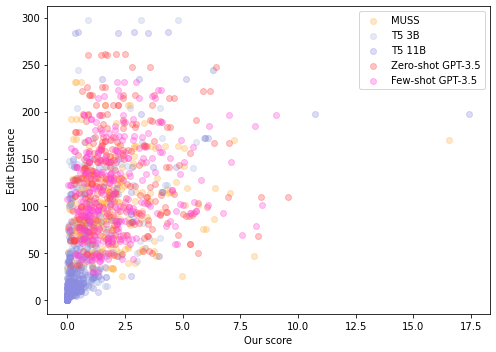

In [10]:
# average_scores: Averages our scores before plotting
for sent in data:
    sent['ed'] = edit_dist(sent['original'], sent['simplified'])
edit_length(data, systems, simpeval=False, average_scores=False)

In [8]:
import utils.dataloader_old as dl
asset = dl.load_data('../data/annotated', batch_num=[1, 2, 3, 4], preprocess=True)

INFO:Loading files: ['../data/annotated/batch_1_anton.json', '../data/annotated/batch_1_ayush.json', '../data/annotated/batch_1_kelly.json', '../data/annotated/batch_2_rachel.json', '../data/annotated/batch_2_vinayak.json', '../data/annotated/batch_2_vishnesh.json', '../data/annotated/batch_3_anton.json', '../data/annotated/batch_3_ayush.json', '../data/annotated/batch_3_kelly.json', '../data/annotated/batch_4_rachel.json', '../data/annotated/batch_4_vinayak.json', '../data/annotated/batch_4_vishnesh.json']

INFO:Found users: {'anton', 'rachel', 'vinayak', 'ayush', 'vishnesh', 'kelly'}

DEBUG:Couldn't process grammar for substitution: ['positive', '', '', '']. Assuming 'no'...
DEBUG:Couldn't process positive rating for substitution: ['positive', '', '', '']. Assuming 'somewhat'...
DEBUG:Couldn't process grammar for deletion: ['good', 'no', '']. Assuming 'no'...
DEBUG:Couldn't process grammar for substitution: ['positive', 'minor', '', '']. Assuming 'no'...
DEBUG:Couldn't process gramma

In [9]:
for sent in data:
    sent['ed'] = edit_dist(sent['original'], sent['simplified'])

In [11]:
for sent in asset:
    sent['ed'] = edit_dist(sent['original'], sent['simplified'])

In [13]:
import random

DEBUG:Assigning font /F1 = 'C:\\Users\\heine\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
DEBUG:Embedding font C:\Users\heine\AppData\Roaming\Python\Python39\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.
DEBUG:Writing TrueType font.


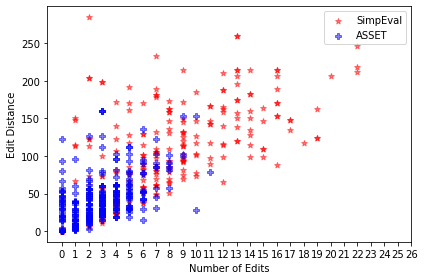

In [25]:
n = 300

pts = []
for sent in data:
    pts += [(
        len(sent['processed_annotations']),
        sent['ed']
    )]
pts = random.sample(pts, n)
x, y = [p[0] for p in pts], [p[1] for p in pts]
plt.scatter(x, y, color='red', label='SimpEval', marker="*", alpha=0.5)

# a, b = np.polyfit(x, y, 1)
# plt.plot(x, a*np.asarray(x)+b, color='red', alpha=0.5)

pts = []
for sent in asset:
    pts += [(
        len(sent['processed_annotations']),
        sent['ed']
    )]
pts = random.sample(pts, n)
x, y = [p[0] for p in pts], [p[1] for p in pts]
plt.scatter(x, y, color='blue', label='ASSET', marker="P", alpha=0.5)

# a, b = np.polyfit(x, y, 1)
# plt.plot(x, a*np.asarray(x)+b, color='blue', alpha=0.5)

plt.xticks(np.arange(0, 27, 1))

# plt.title('Edit Distance vs. Number of Edits')
plt.xlabel('Number of Edits')
plt.ylabel('Edit Distance')
plt.legend()
out_filename = f'../paper/plot/appendix/edit-distance-num-edits.pdf'
plt.savefig(out_filename, format="pdf", bbox_inches='tight', pad_inches=0.0)
plt.show()

In [ ]:
# average_scores: Averages our scores before plotting
for sent in data:
    sent['ed'] = edit_dist(sent['original'], sent['simplified'])

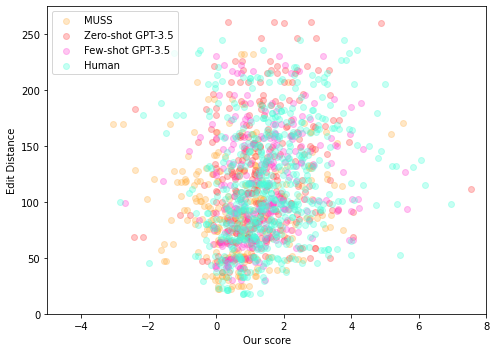

In [ ]:
simpeval=False

# Averages scores across sentences with the same ID
# new_data = copy.deepcopy(data)
# for id_ in set([sent['id'] for sent in data]):
#     sents = [sent for sent in data if sent['id'] == id_]
#     new_score = avg([sent['score'] for sent in sents])
#     for i in range(len(new_data)):
#         if new_data[i]['id'] == id_:
#             new_data[i]['score'] = new_score
# data = new_data

total_sent = 0

selected_systems = [
    'new-wiki-1/Muss',
    'aggregated/human',
    'new-wiki-1/GPT-3-zero-shot',
    'new-wiki-1/GPT-3-few-shot',
]

for system in [s for s in all_system_labels if s in selected_systems]:
    # Also graph SimpEval Scores
    # scores = [(avg(sent['simpeval_scores'], prec=10), sent['ed']) for sent in data if sent['system'] == system]
    
    if system == 'aggregated/human':
        selected = [s for s in data if 'Human' in s['system']]
    else:
        selected = [s for s in data if s['system'] == system]


    scores = [(sent['score'], sent['ed']) for sent in selected]
    plt.scatter([p[0] for p in scores], [p[1] for p in scores], c=color_mapping[system], alpha=0.3, label=system_name_mapping[system])
    total_sent += len(scores)

plt.xlabel('Our score')
plt.ylabel('Edit Distance')

# set plt y scale to log
# plt.xscale('log')
# plt.yscale('log')

plt.xlim(-5, 8)
plt.ylim(0, 275)

plt.gcf().set_size_inches(7, 5)
plt.legend()
out_filename = f'../paper/plot/edit-distance-vs-score.pdf'
plt.savefig(out_filename, format="pdf", bbox_inches='tight', pad_inches=0.0)
plt.show()